In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.special import softmax

from crsaarr.src.utils import Predictions
from crsaarr.src.datasets.mddial2 import MDDialDataset

MDDialDataset.data_dir = "../" + MDDialDataset.data_dir


488
Dialog ID: 488
PATIENT: I have been feeling Chest tightness and Pain behind the breastbone
DOCTOR: What about Chest tightness and shortness of breath?


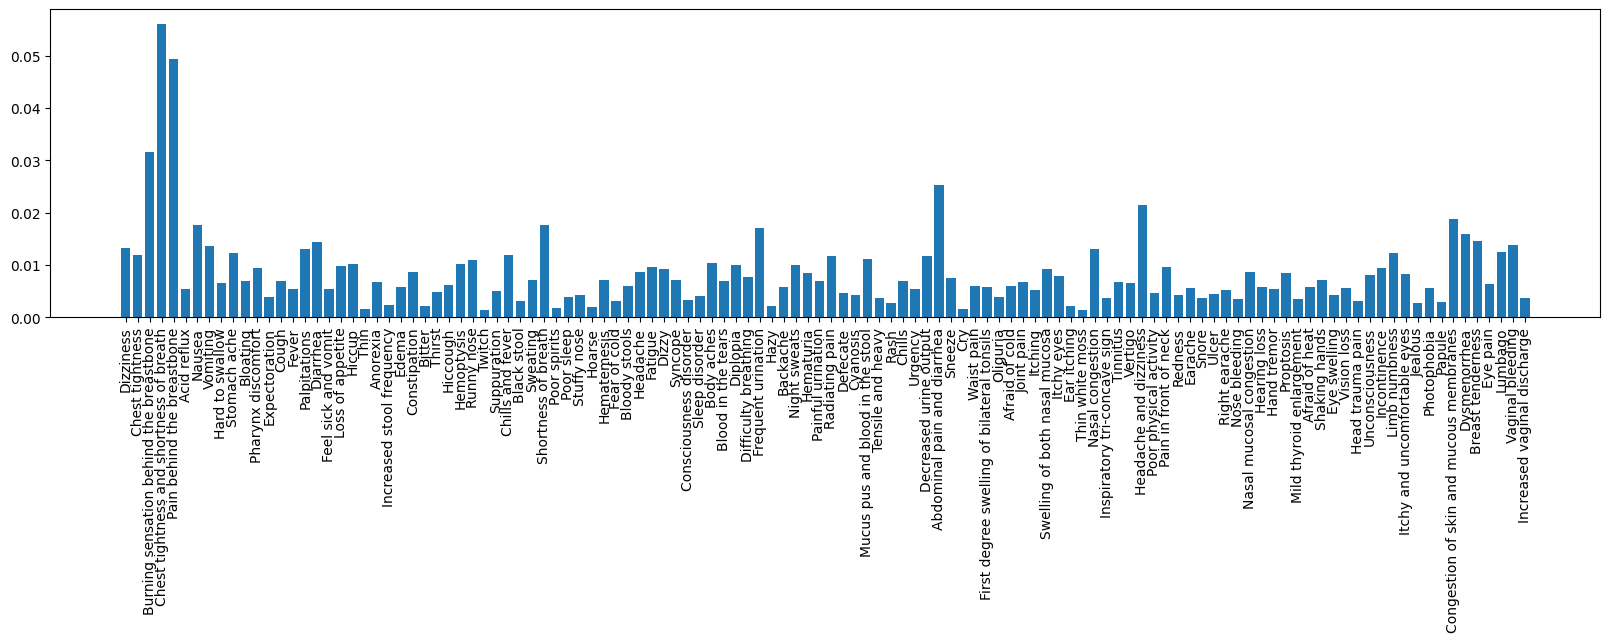


PATIENT: No, I never had anything like that.


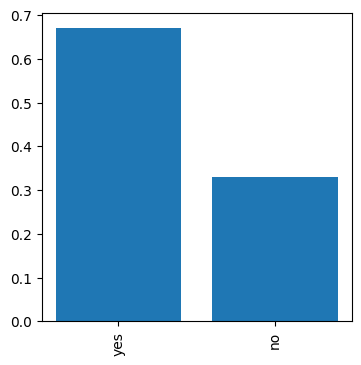


DOCTOR: Oh, do you have any Hazy?


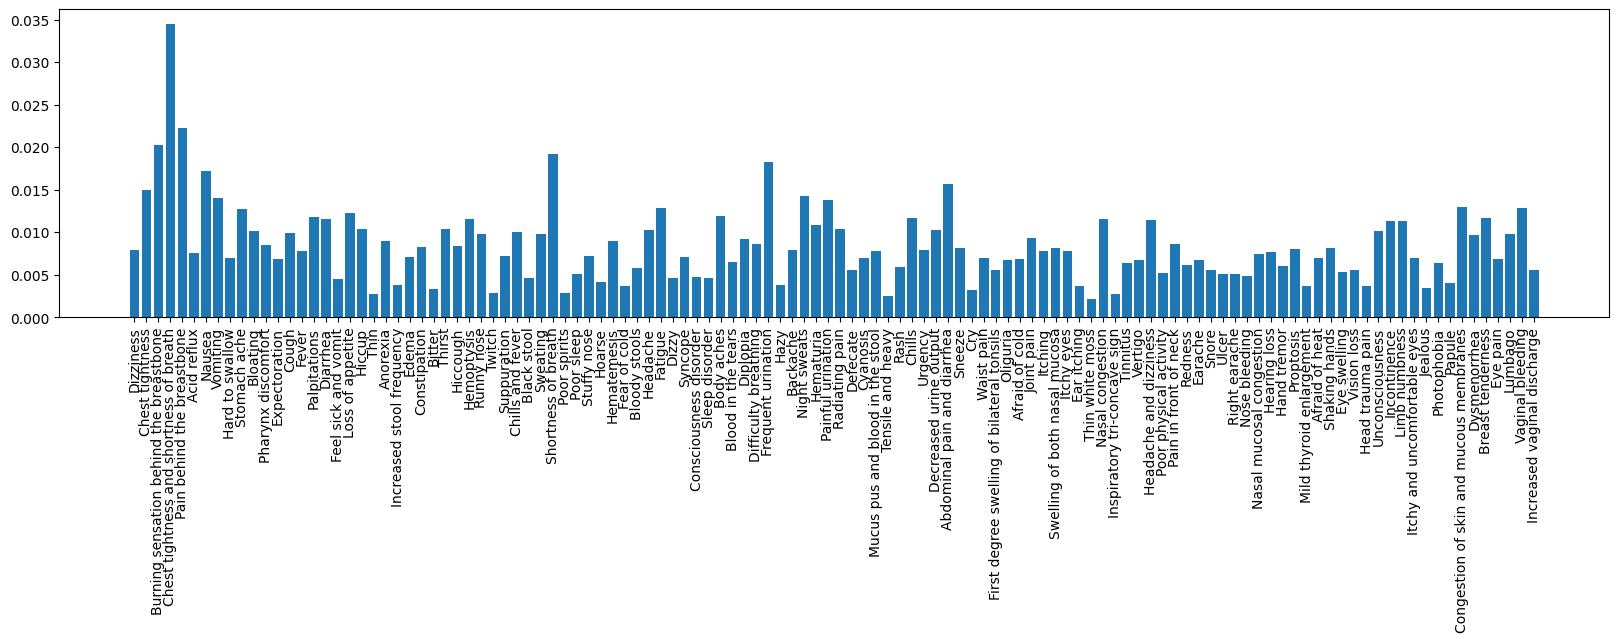


PATIENT: No, I don't have that


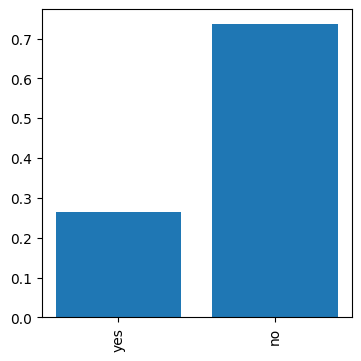


DOCTOR: Is it? Then do you experience Palpitations?


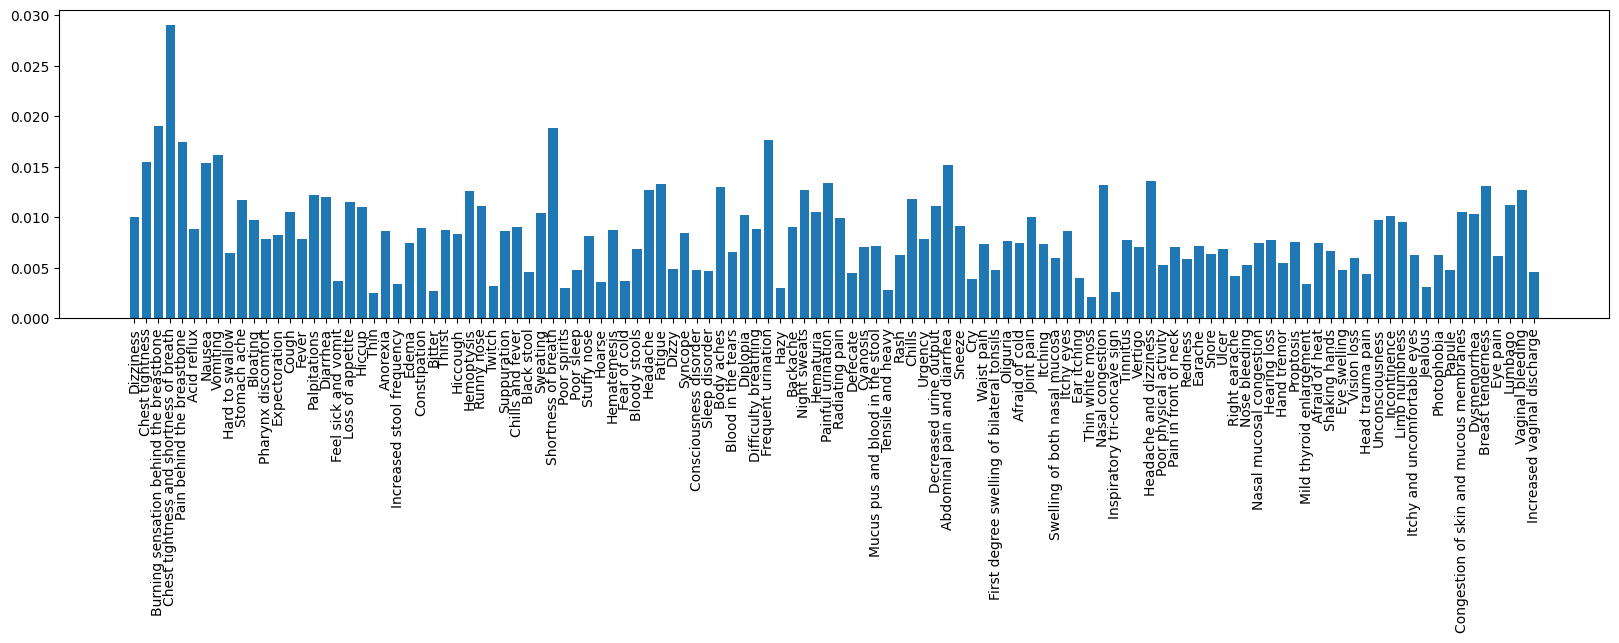


PATIENT: Well not in my knowledge


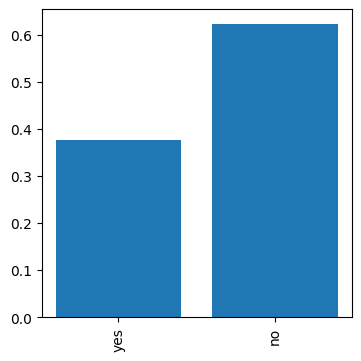


DOCTOR: What about Syncope?


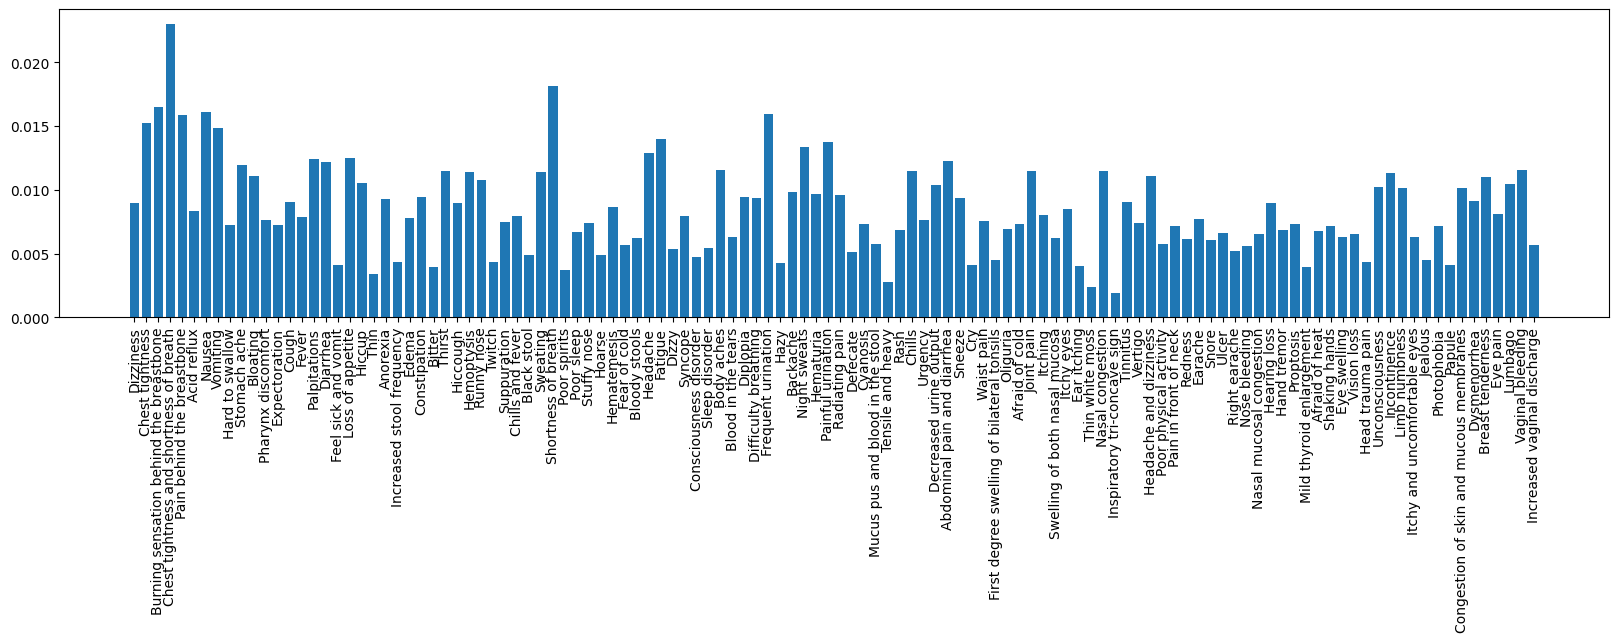


PATIENT: Well not in my knowledge


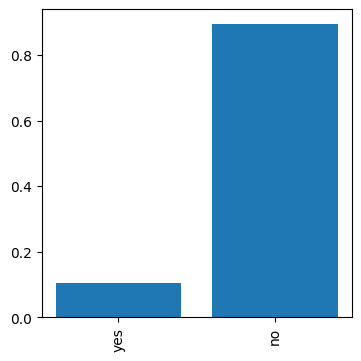


DOCTOR: This could probably be Coronary heart disease.
TRUE DISEASE:  Coronary heart disease


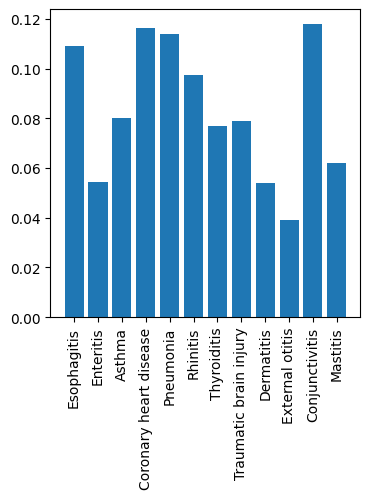

In [3]:
def print_dialog(pred_sample, data_sample, symptoms, diseases):
    for turn, turn_data in enumerate(data_sample["utterances"], start=1):
        print(turn_data["speaker"].upper() + ": " + turn_data["content"])
        if turn > 1 and turn < len(data_sample["utterances"]):
            if turn_data["speaker"] == "doctor":
                fig, ax = plt.subplots(1,1, figsize=(20,4))
                speaker_logprob = softmax(pred_sample["turns"][turn-2]["speaker_logprob"][:,0])
                ax.bar(symptoms, speaker_logprob)
                ax.set_xticks(range(len(symptoms)))
                ax.set_xticklabels(symptoms, rotation=90)
            else:
                fig, ax = plt.subplots(1,1, figsize=(4,4))
                speaker_logprob = softmax(pred_sample["turns"][turn-2]["speaker_logprob"][:,data_sample["disease"]])
                ax.bar(["yes", "no"], speaker_logprob)
                ax.set_xticks([0,1])
                ax.set_xticklabels(["yes", "no"], rotation=90)
            plt.show()
            print()
    print("TRUE DISEASE: ", diseases[data_sample["disease"]])
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    listener_dist = softmax(pred_sample["category_distribution"])
    ax.bar(diseases, listener_dist)
    ax.set_xticks(range(len(diseases)))
    ax.set_xticklabels(diseases, rotation=90)
    plt.show()



predictions = Predictions(Path("../outputs/run_mddial2/meta-llama/Llama-3.2-1B-Instruct/predictions"))
dataset = MDDialDataset("train")
idx = predictions.predictions_ids[0]
print(idx)
print(f"Dialog ID: {dataset[idx]['idx']}")
print_dialog(predictions[idx], dataset[idx], dataset.world["symptoms"], dataset.world["diseases"])